## lib load

In [94]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Tuple

import torch

## plot func

In [56]:
def plot_func(act_func_value, derivative_value, act_func_name):
    
    fig, ax = plt.subplots(figsize=(7, 4))
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.plot(x, act_func_value, color="#307EC7", linewidth=3, label=act_func_name)
    ax.plot(x, derivative_value, color="#9621E2", linewidth=3, label="derivative")
    
    ax.legend(loc="upper left", frameon=False)

## act func

In [28]:
def linear(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # linear
    l = x
    # derivative
    dl = np.ones(len(x))
    return l, dl

In [61]:
def unit(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # unit
    u = np.where(x > 0, 1, 0)
    # derivative
    du = np.zeros(len(x))
    return u, du

In [11]:
def sigmoid(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # sigmoid
    s = 1 / (1 + np.exp(-x))
    # derivative
    ds = s * (1 - s)
    return s, ds

In [65]:
def tanh(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # tanh
    t = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    # derivative
    dt = 1 - np.tanh(x) ** 2
    return t, dt

In [20]:
def relu(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # ReLU
    r = np.maximum(x, 0)
    # derivative
    dr = np.where(x > 0, 1, 0)
    return r, dr

In [92]:
def leakyrelu(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # Leaky ReLU
    lr = np.maximum(0.1 * x, x)
    # derivative
    dlr = np.where(x > 0, 1, 0.1)
    return lr, dlr

In [73]:
def parameticrelu(x : np.ndarray, a : int) -> Tuple[np.ndarray, np.ndarray]:
    # Parametic ReLU
    pr = np.maximum(a * x, x)
    # derivative
    dpr = np.where(x > 0, 1, a)
    return pr, dpr

In [108]:
def silu(x : np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # sigmoid linear unit
    sig, ds = sigmoid(x)
    si = x * sig
    # derivative
    dsi = sig + x * ds
    return si, dsi

In [117]:
def swishrelu(x : np.ndarray, b : int = 0.01) -> Tuple[np.ndarray, np.ndarray]:
    # sigmoid linear unit
    sig, ds = sigmoid(b * x)
    sw = x * sig
    # derivative
    dsw = sig + x * sw
    return sw, dsw

## value

In [26]:
x = np.arange(-6,6,0.01)

## Visualization

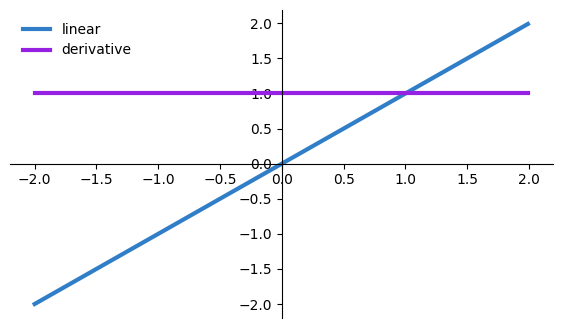

In [152]:
l, dl = linear(x)
plot_func(l, dl, 'linear')

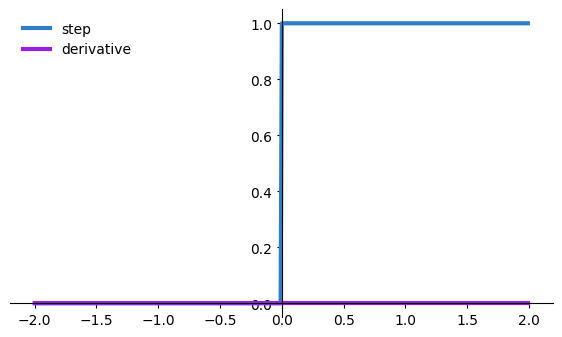

In [153]:
u, du = unit(x)
plot_func(u, du, 'step')

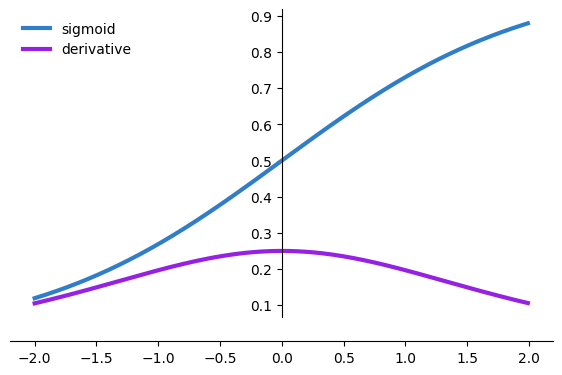

In [154]:
s, ds = sigmoid(x)
plot_func(s, ds, 'sigmoid')

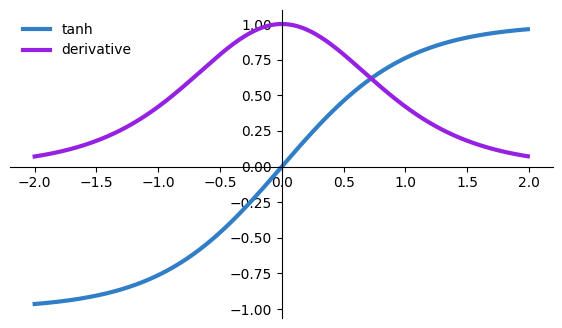

In [155]:
t, dt = tanh(x)
plot_func(t, dt, 'tanh')

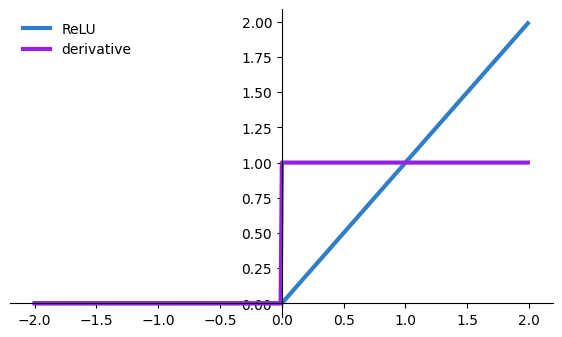

In [156]:
r, dr = relu(x)
plot_func(r, dr, 'ReLU')

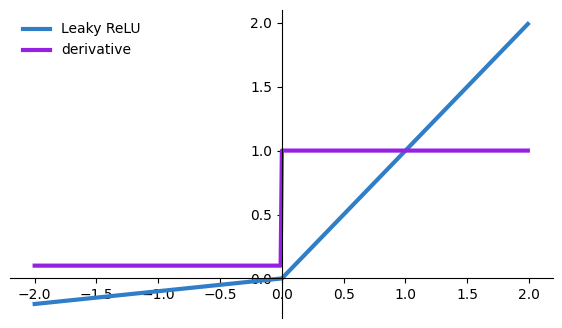

In [157]:
lr, dlr = leakyrelu(x)
# (0.1x, x)
plot_func(lr, dlr, 'Leaky ReLU')

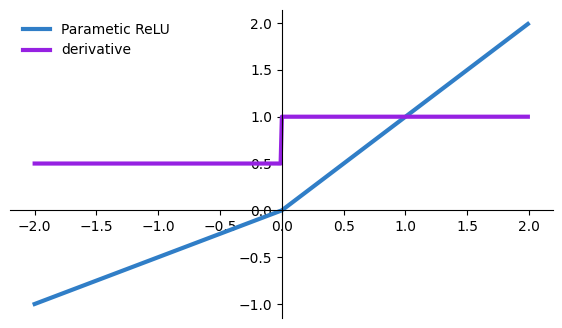

In [237]:
pr, dpr = parameticrelu(x, 0.5)
plot_func(pr, dpr, 'Parametic ReLU')

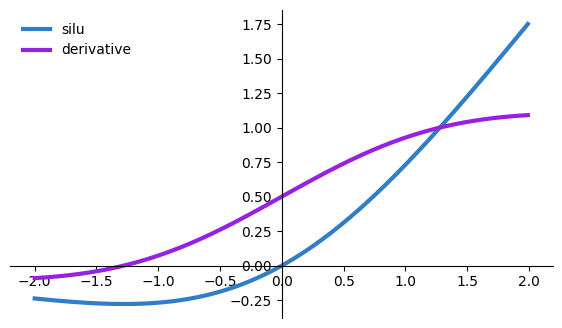

In [159]:
si, dsi = silu(x)
plot_func(si, dsi, 'silu')

In [160]:
# sw, dsw = swishrelu(x, b=10)
# plot_func(sw, dsw, 'swish relu')

## Total

In [150]:
x = np.arange(-2,2,0.01)

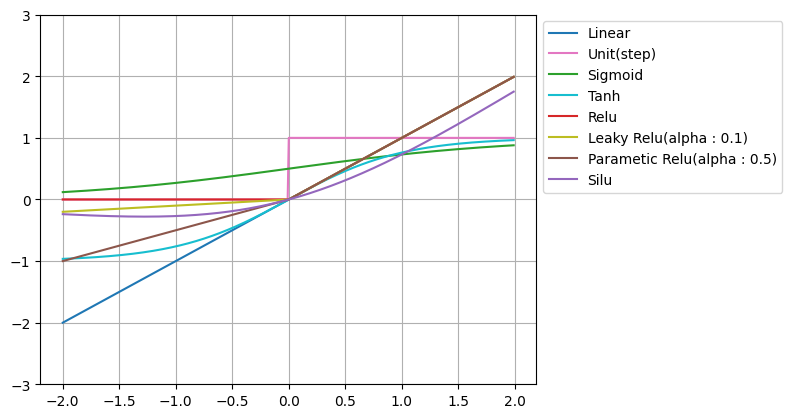

In [238]:
plt.plot(figsize=(8, 4))

plt.plot(x, l, label = 'Linear', color='tab:blue')
plt.plot(x, u, label = 'Unit(step)', color='tab:pink')
plt.plot(x, s, label = 'Sigmoid', color='tab:green')
plt.plot(x, t, label = 'Tanh', color='tab:cyan')
plt.plot(x, r, label = 'Relu', color='tab:red')
plt.plot(x, lr, label = 'Leaky Relu(alpha : 0.1)', color='tab:olive')
plt.plot(x, pr, label = 'Parametic Relu(alpha : 0.5)', color='tab:brown')
plt.plot(x, si, label = 'Silu', color='tab:purple')

plt.ylim(-3, 3)
plt.grid(visible=True)

# plt.legend()
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

plt.show()

In [239]:
act_nm = ['Linear', 'Unit(step)', 'Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU(alpha : 0.1)', 'Parametic ReLU(alpha : 0.5)', 'Silu']
act_func_ = [l, u, s, t, r, lr, pr, si]
dv = [dl, du, ds, dt, dr, dlr, dpr, dsi]

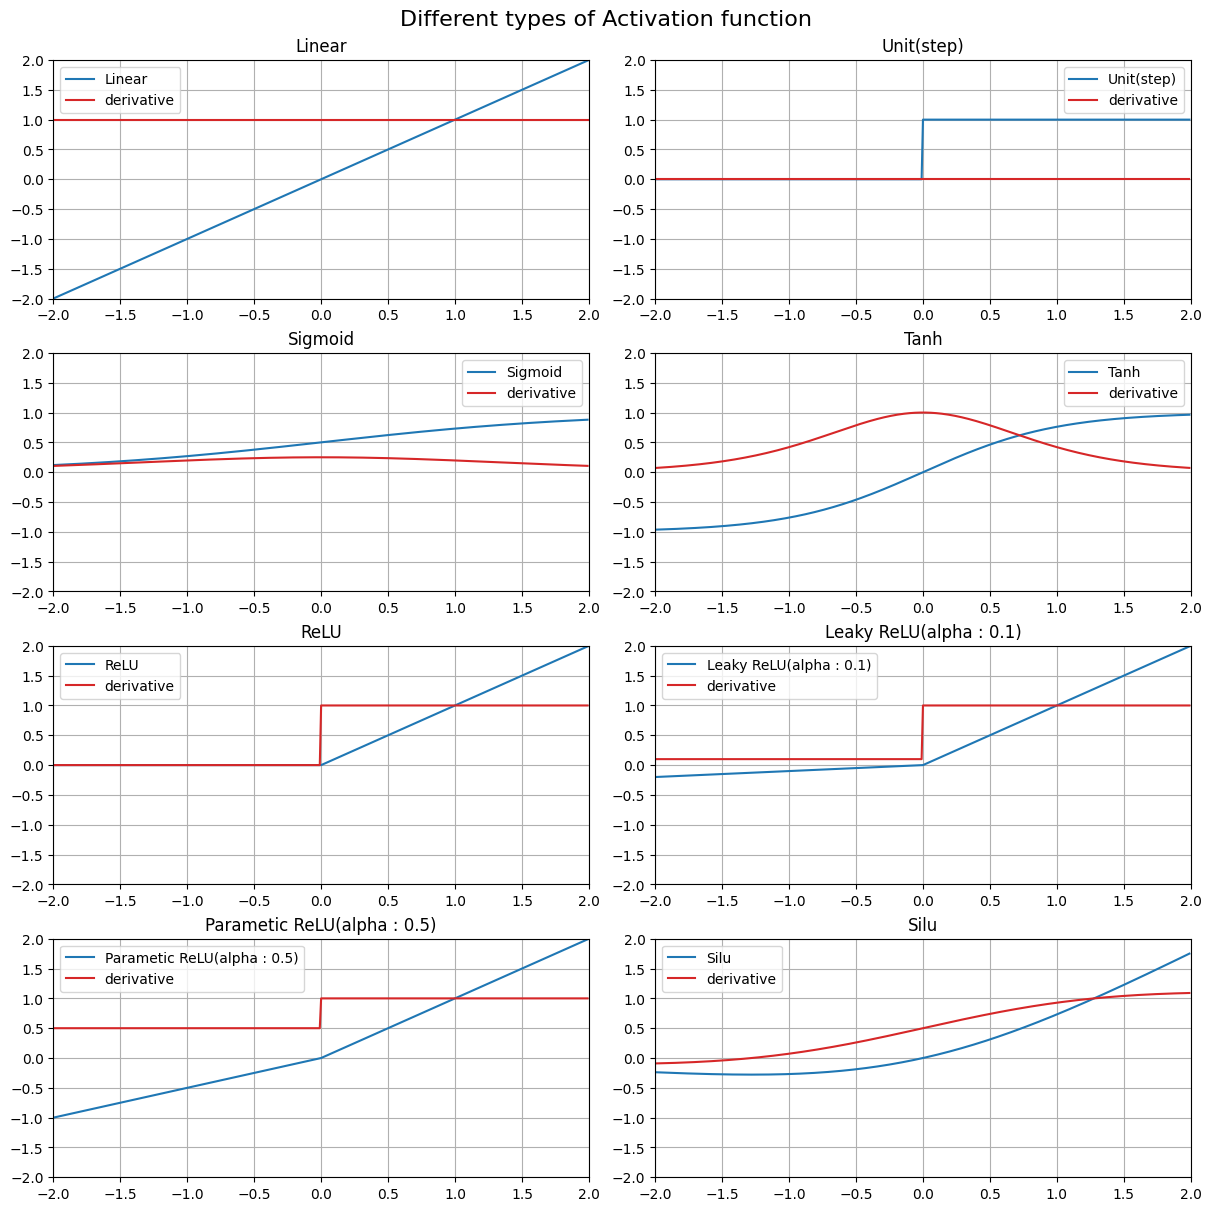

In [240]:
fig, axs = plt.subplots(4, 2, layout = 'constrained', figsize=(12, 12))

for ax, act, dev, title in zip(axs.flat, act_func_, dv, act_nm):
    
    ax.plot(x, act, label = title, color='tab:blue')
    ax.plot(x, dev, label = 'derivative', color='tab:red')
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
        
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    
    
fig.suptitle('Different types of Activation function', fontsize=16)
plt.show()